### Other Cities

In [3]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
!pip install squarify
import squarify
!pip install plotly
import plotly.express as px
!pip install mysql-connector-python
import mysql.connector
!pip install pymysql
import pymysql

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read and display first 3 rows of the data set 

other_cities = pd.read_csv('C:/Users/User/Downloads/other_cities_df.csv')
other_cities.head(3)

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,covid,date,stringency
0,0,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified,0,2018-01,0.0
1,1,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified,0,2018-01,0.0
2,2,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified,0,2018-01,0.0


In [5]:
# drop Unnamed column

other_cities.drop('Unnamed: 0', inplace=True, axis=1) 

In [6]:
# display data shape

other_cities.shape

(1220535, 12)

In [7]:
# display data information 

other_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   month                  1220535 non-null  object 
 1   reported by            1220535 non-null  object 
 2   longitude              1220535 non-null  float64
 3   latitude               1220535 non-null  float64
 4   location               1220535 non-null  object 
 5   lsoa code              1220535 non-null  int64  
 6   lsoa name              1220535 non-null  object 
 7   crime type             1220535 non-null  object 
 8   last outcome category  1220535 non-null  object 
 9   covid                  1220535 non-null  int64  
 10  date                   1220535 non-null  object 
 11  stringency             1220535 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 111.7+ MB


In [8]:
# describe the dataset

other_cities.describe()

,longitude,latitude,lsoa code,covid,stringency
count,1.220535e+06,1.220535e+06,1.220535e+06,1.220535e+06,1.220535e+06
mean,-1.988273e+00,5.333139e+01,1.014244e+06,4.088478e-01,2.638383e+01
std,5.759625e-01,7.865032e-01,8.898407e+03,4.916213e-01,3.310498e+01
min,-3.002089e+00,5.139996e+01,1.006512e+06,0.000000e+00,0.000000e+00
25%,-2.591272e+00,5.338264e+01,1.008098e+06,0.000000e+00,0.000000e+00
50%,-1.732999e+00,5.374436e+01,1.011322e+06,0.000000e+00,0.000000e+00
75%,-1.527028e+00,5.380211e+01,1.014542e+06,1.000000e+00,6.430310e+01
max,-1.306890e+00,5.394893e+01,1.033768e+06,1.000000e+00,8.748037e+01


In [9]:
#check for null values in dataset
other_cities.isna().sum()

month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
covid                    0
date                     0
stringency               0
dtype: int64

In [10]:
# display total number of street crimes reported per city 
other_cities['lsoa name'].value_counts()

Leeds        366495
Bradford     261950
Liverpool    223188
Sheffield    194924
Bristol      173978
Name: lsoa name, dtype: int64

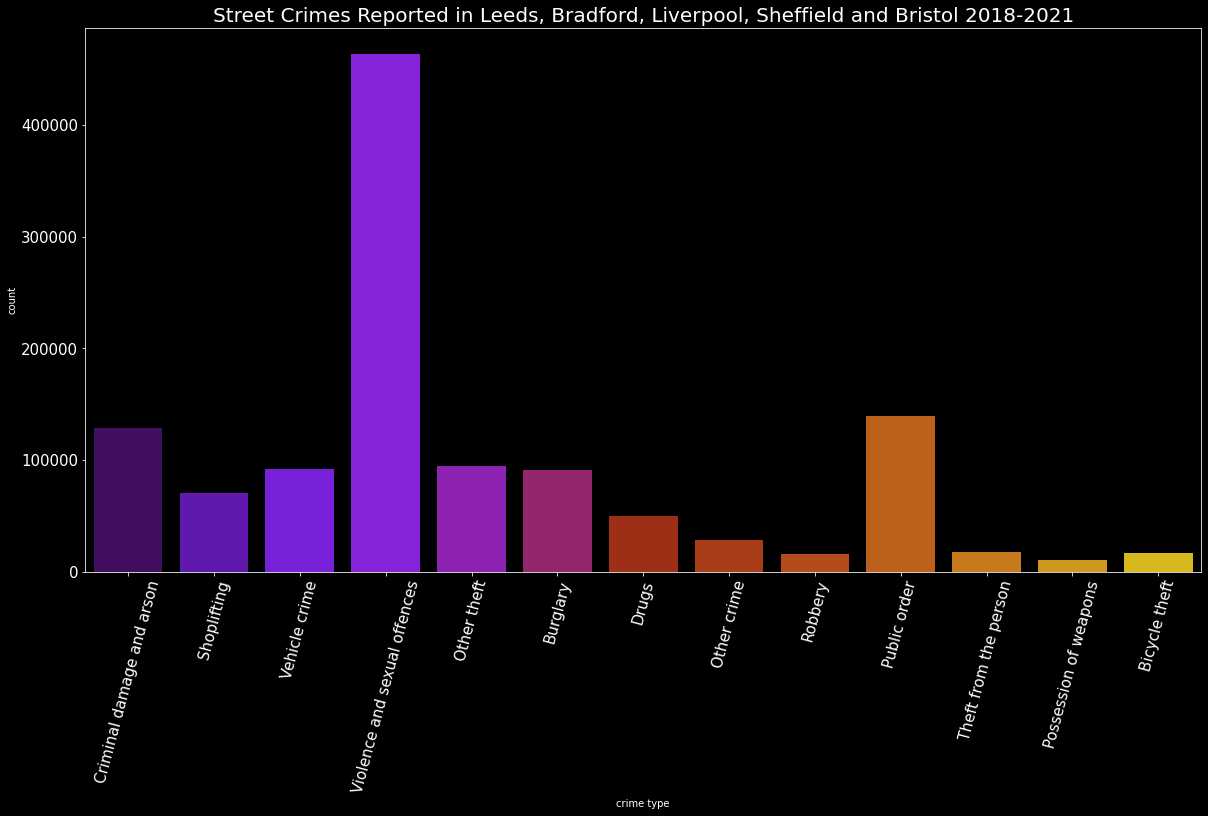

In [11]:
# crime count for all the five cities - Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('dark_background')

sns.countplot(other_cities['crime type'], palette = 'gnuplot')

plt.title('Street Crimes Reported in Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(False)
plt.show()

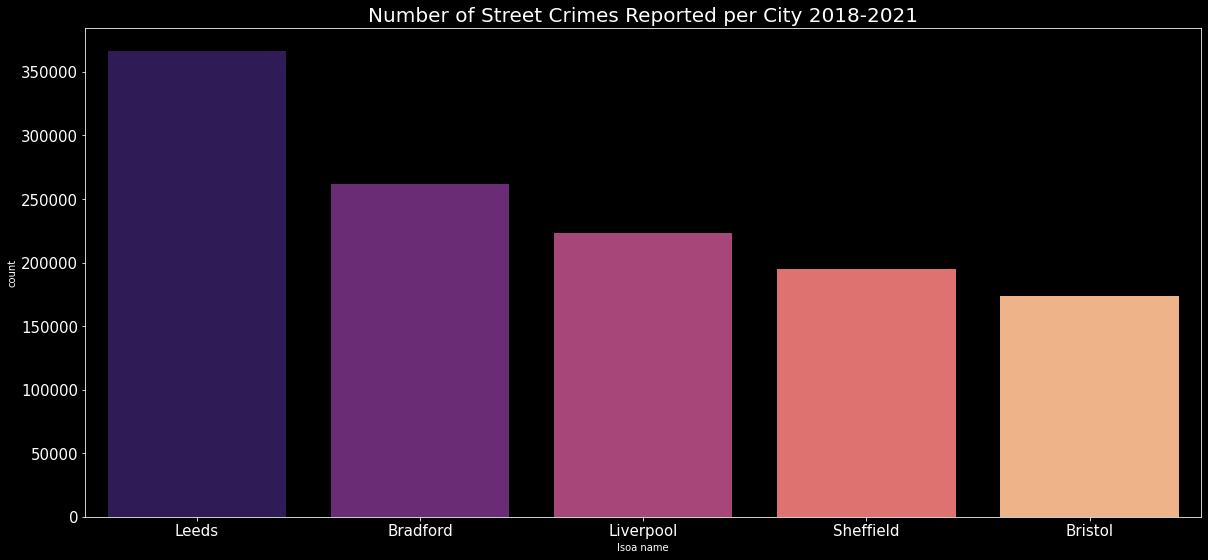

In [12]:
# count of crimes per city

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['lsoa name'], palette = 'magma')

plt.title('Number of Street Crimes Reported per City 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(False)
plt.show()

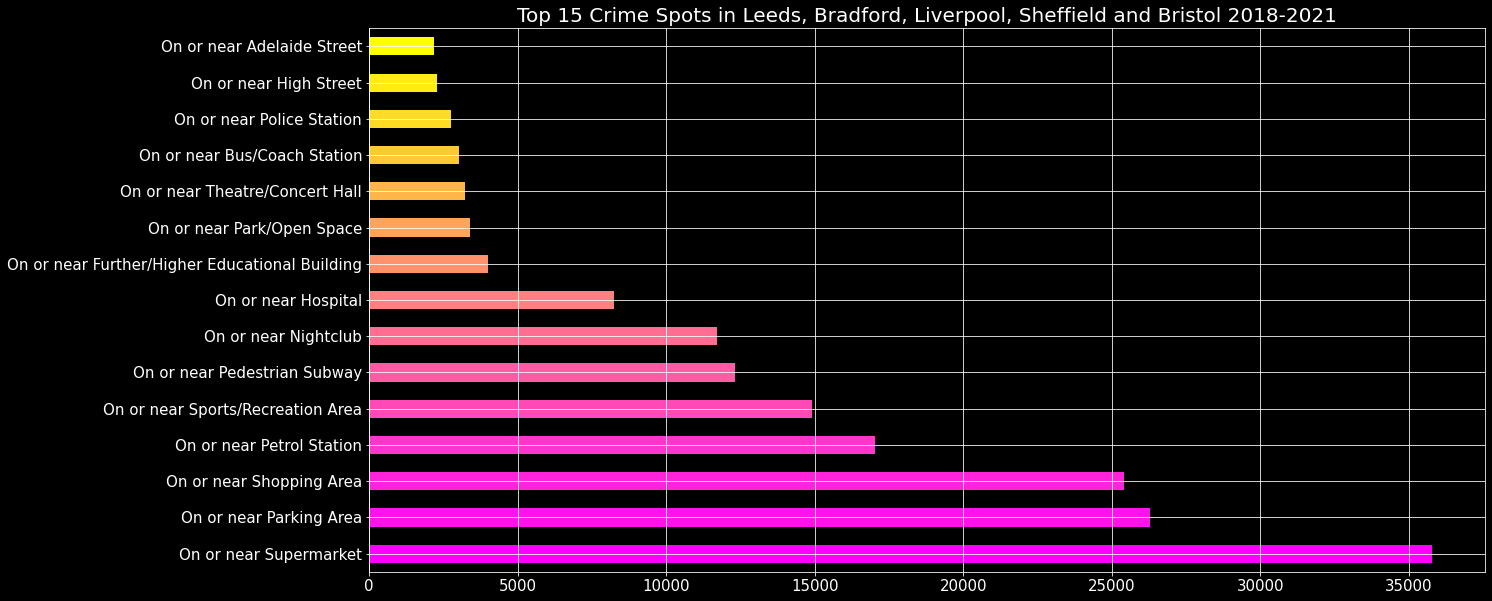

In [13]:
# display top 15 crime locations

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
other_cities['location'].value_counts().head(15).plot.barh(color = color, figsize = (20, 10))

plt.title('Top 15 Crime Spots in Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021',fontsize = 20)

plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.grid(b=None)
plt.show()

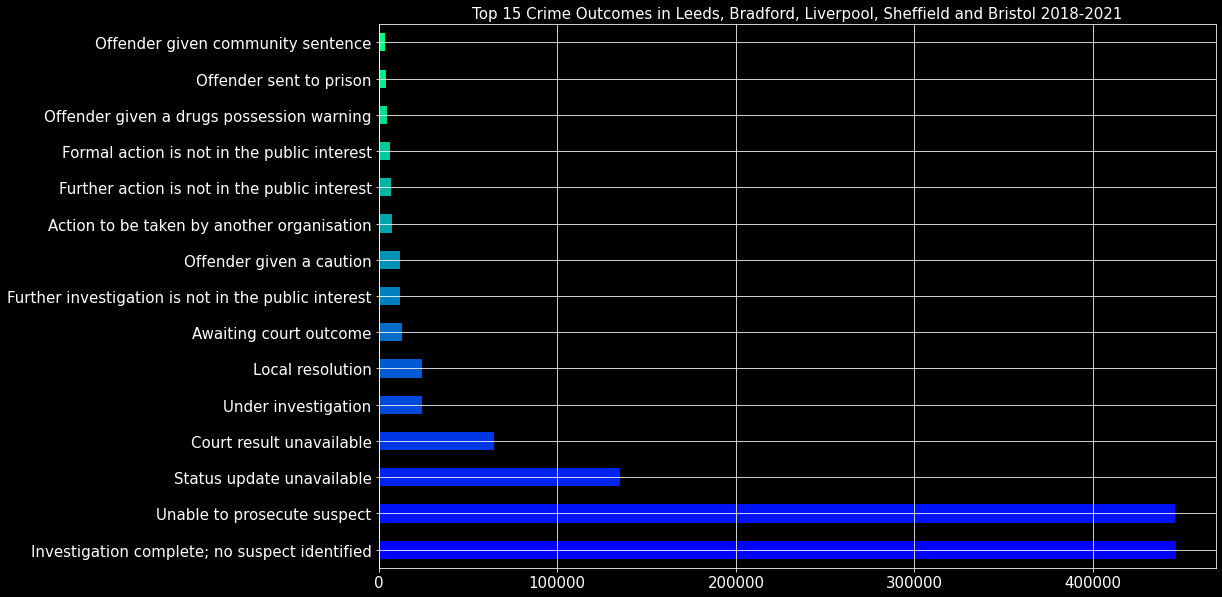

In [14]:
# display outcomes of top 15 crimes reported

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
other_cities['last outcome category'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes in Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021',fontsize = 15)

plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.grid(b=None)
plt.show()

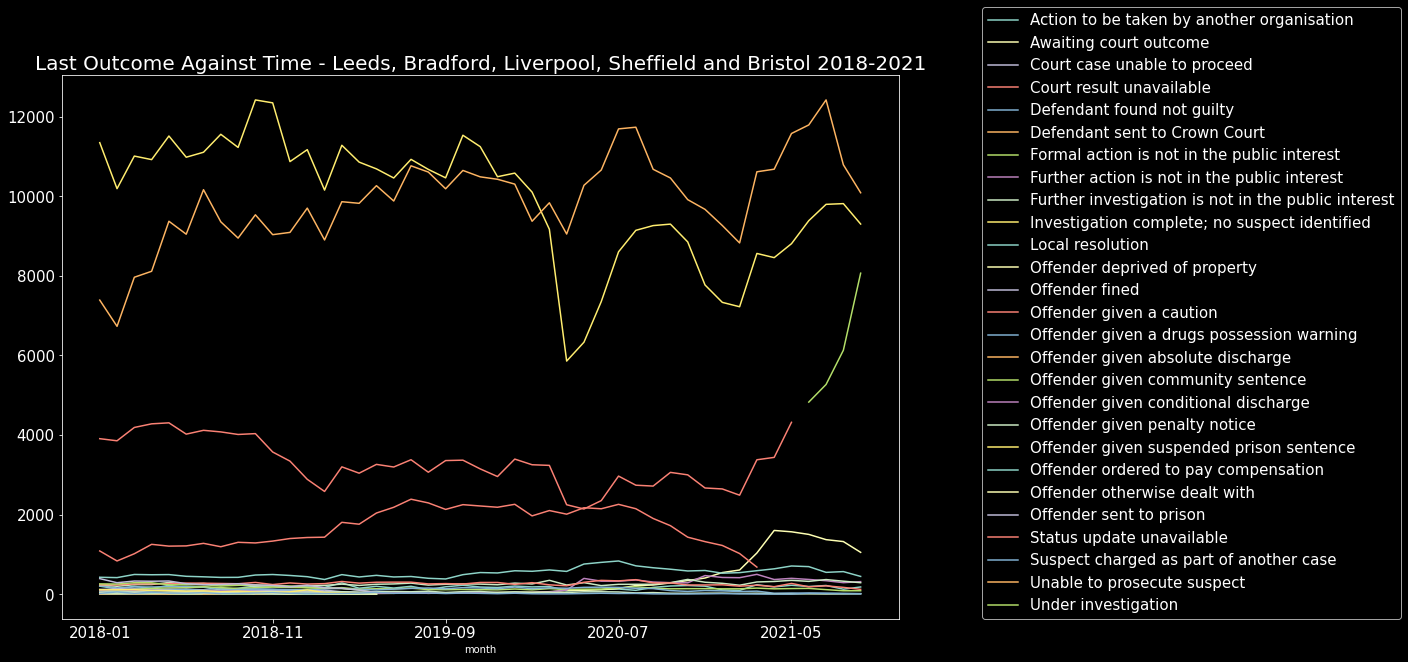

In [15]:
# crime outcomes 2018-2021

plt.style.use('dark_background')
m = other_cities.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
plt.title('Last Outcome Against Time - Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021',fontsize = 20)
plt.grid(False)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
m.legend(loc=(1.1,0), fontsize = 15)

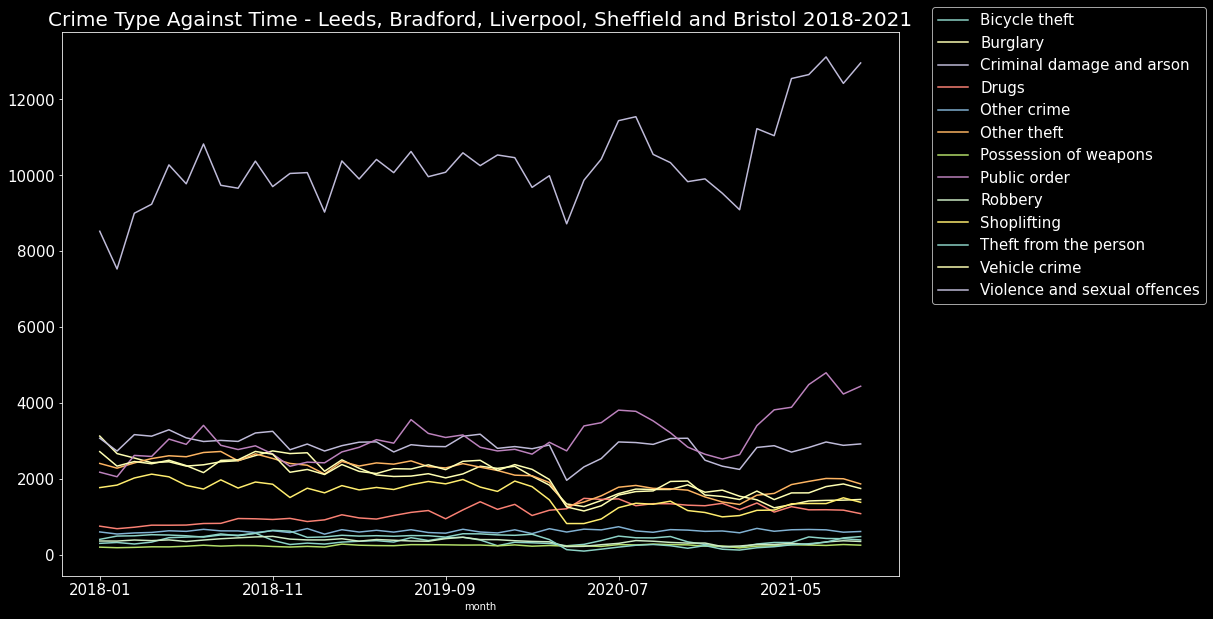

In [16]:
m = other_cities.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(False)

plt.title('Crime Type Against Time - Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021',fontsize = 20)
plt.grid(False)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
m.legend(loc=(1.04,0.5), fontsize = 15)

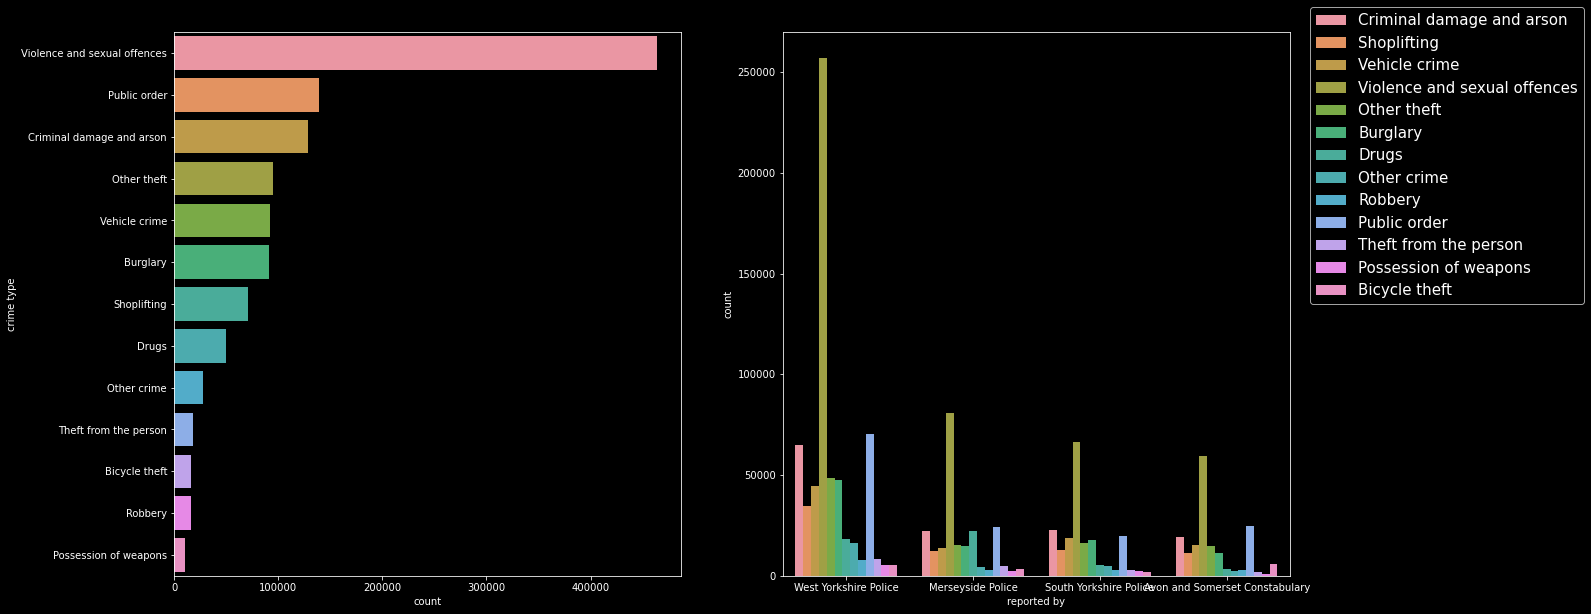

In [17]:
# crime type in five cities and crime count by police force 2018-2021

fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(y='crime type', data=other_cities, order=other_cities['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=other_cities, order = other_cities['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5), fontsize = 15)
plt.show()

In [18]:
# display top 10 crime count for Leeds, Bradford, Liverpool, Sheffield and Bristol for years 2018-2021

other_cities = pd.read_csv('C:/Users/User/Downloads/other_cities_df.csv')

other_cities['crime type'].value_counts().head(10)

Violence and sexual offences    463991
Public order                    139385
Criminal damage and arson       129031
Other theft                      94682
Vehicle crime                    92373
Burglary                         91292
Shoplifting                      70628
Drugs                            49485
Other crime                      28174
Theft from the person            18043
Name: crime type, dtype: int64

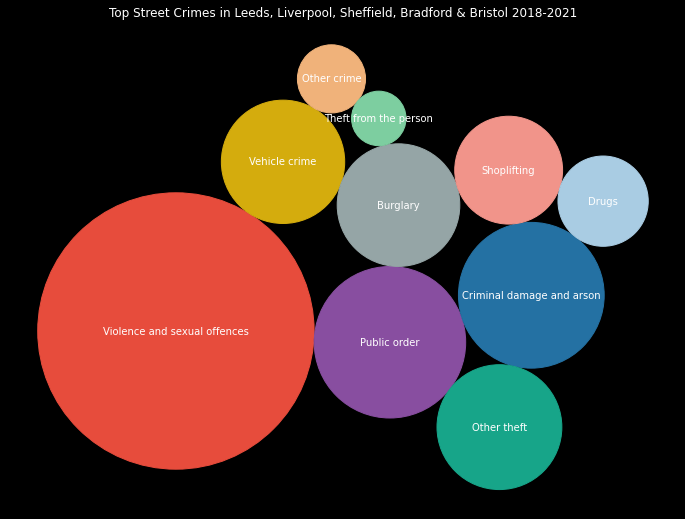

In [19]:
# another visualisation for top street crimes reported

other_cities = {
    'crime_type': ['Violence and sexual offences', 'Public order', 'Criminal damage and arson', 'Other theft', 'Vehicle crime', 'Burglary', 'Shoplifting', 'Drugs', 'Other crime', 'Theft from the person'],
    'crime_numbers': [463991, 139385, 129031, 94682, 92373, 91292, 70628, 49485, 28174, 18043],
    'color': ['#E74C3C', '#884EA0', '#2471A3', '#17A589', '#D4AC0D', '#95A5A6', '#F1948A', '#A9CCE3', '#F0B27A', '#7DCEA0']
}

class crime_chart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


chart = crime_chart(area=other_cities['crime_numbers'],
                           bubble_spacing=1.0)

chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
chart.plot(
    ax, other_cities['crime_type'], other_cities['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top Street Crimes in Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021')

plt.show();

In [20]:
# display top 10 crime locations

other_cities = pd.read_csv('C:/Users/User/other_cities_df.csv')
other_cities['location'].value_counts().head(10)


On or near Supermarket                            35789
On or near Parking Area                           26276
On or near Shopping Area                          25405
On or near Petrol Station                         17042
On or near Sports/Recreation Area                 14901
On or near Pedestrian Subway                      12324
On or near Nightclub                              11707
On or near Hospital                                8256
On or near Further/Higher Educational Building     3996
On or near Park/Open Space                         3401
Name: location, dtype: int64

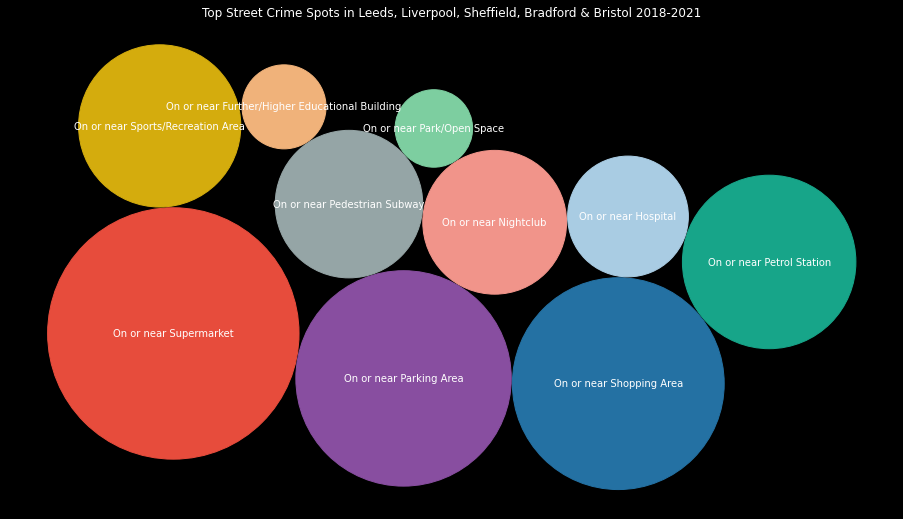

In [21]:
# bubble visualisation for top street crime locations 

other_cities = {
    'crime_loc': ['On or near Supermarket', 'On or near Parking Area', 'On or near Shopping Area', 'On or near Petrol Station', 'On or near Sports/Recreation Area', 'On or near Pedestrian Subway', 'On or near Nightclub', 'On or near Hospital', 'On or near Further/Higher Educational Building', 'On or near Park/Open Space'],
    'crime_loc_num': [35789, 26276, 25405, 17042, 14901, 12324, 11707, 8256, 3996, 3401],
    'color': ['#E74C3C', '#884EA0', '#2471A3', '#17A589', '#D4AC0D', '#95A5A6', '#F1948A', '#A9CCE3', '#F0B27A', '#7DCEA0']
}

class crime_chart:
    def __init__(self, area, bubble_spacing=0):

        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
 
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


chart = crime_chart(area=other_cities['crime_loc_num'],
                           bubble_spacing=1.0)

chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
chart.plot(
    ax, other_cities['crime_loc'], other_cities['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top Street Crime Spots in Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021')

plt.show();

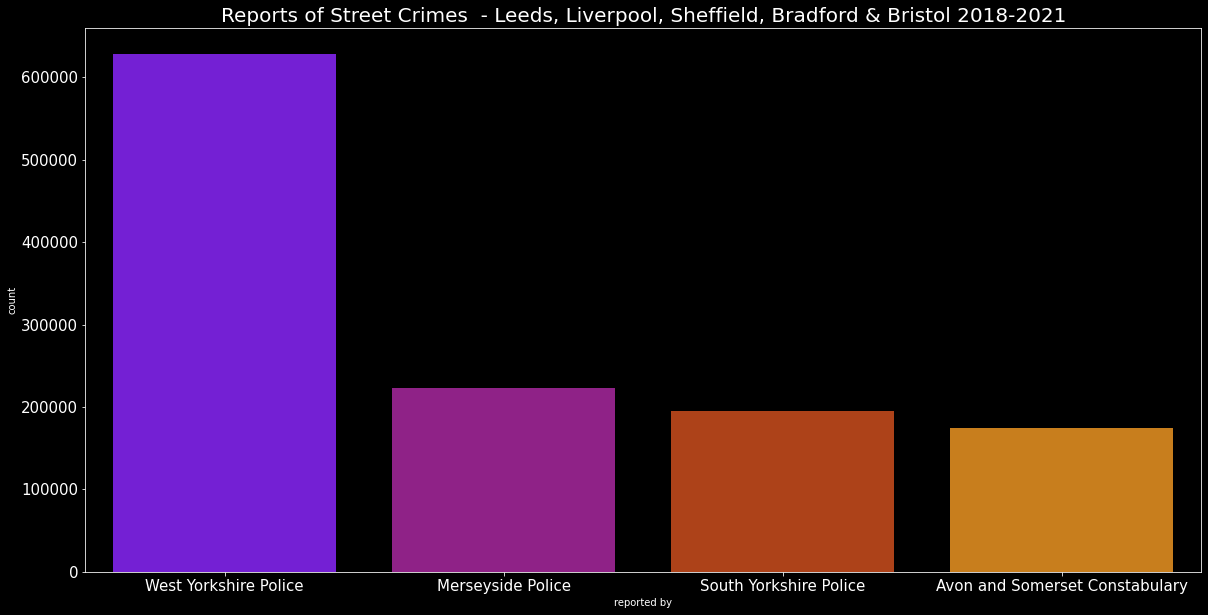

In [22]:
# display street crimes received by which police force from 2018-2021

other_cities = pd.read_csv('C:/Users/User/other_cities_df.csv')

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('dark_background')

sns.countplot(other_cities['reported by'], palette = 'gnuplot')

plt.title('Reports of Street Crimes  - Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid(False)
plt.show();

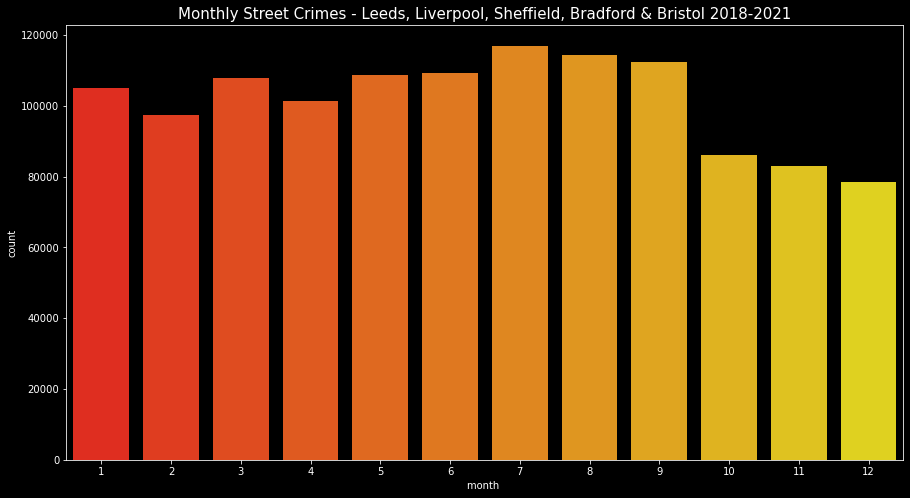

In [23]:
#  street crimes reported for 2018-2021

other_cities['month'] = pd.to_datetime(other_cities['month'])

other_cities['month '] = other_cities['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_cities['month '], palette = 'autumn',)
plt.title('Monthly Street Crimes - Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021', fontsize = 15)

plt.show()

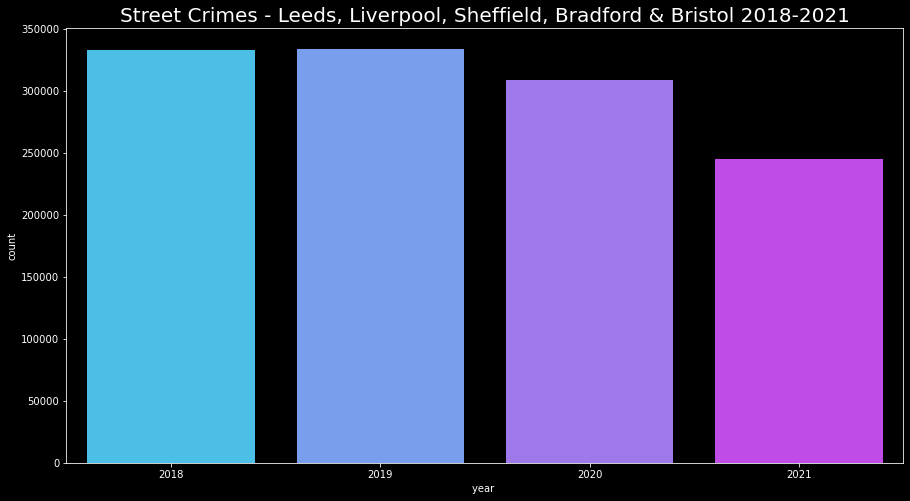

In [24]:
# display street crimes reported for years 2018-2021

other_cities['month'] = pd.to_datetime(other_cities['month'])

other_cities['year '] = other_cities['month'].dt.year

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_cities['year '], palette = 'cool',)
plt.title('Street Crimes - Leeds, Liverpool, Sheffield, Bradford & Bristol 2018-2021', fontsize = 20)

plt.show()

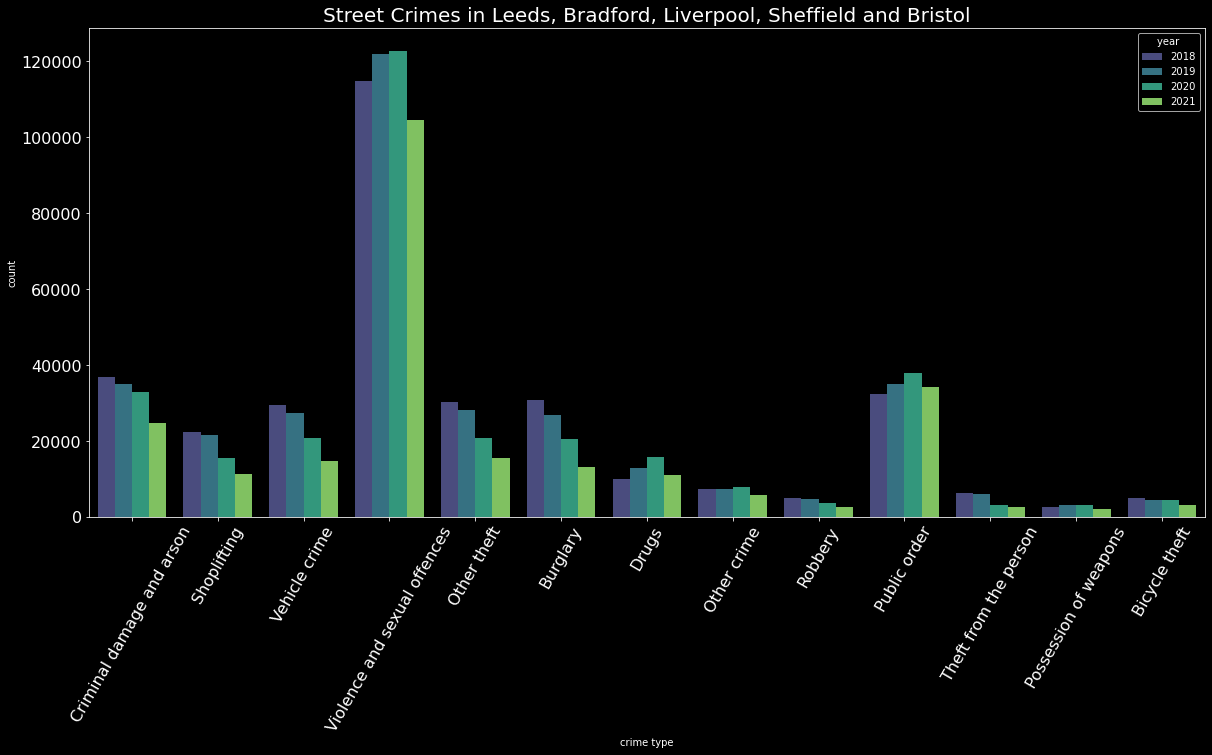

In [26]:
# display types of crime reported per year

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(other_cities['crime type'], hue=other_cities['year '], palette = 'viridis')

plt.title('Street Crimes in Leeds, Bradford, Liverpool, Sheffield and Bristol', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 60, fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(False)
plt.show()

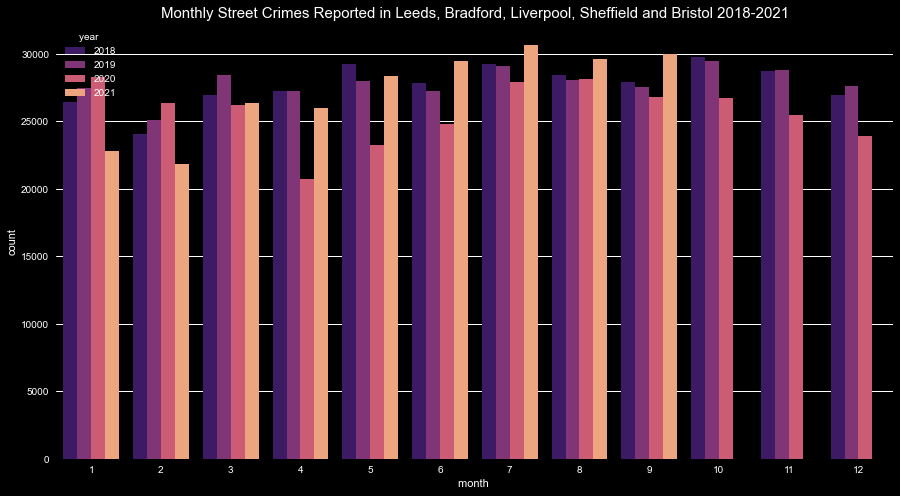

In [216]:
# display crimes reported for each month per year

other_cities['month'] = pd.to_datetime(other_cities['month'])

other_cities['month '] = other_cities['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_cities['month '], hue=other_cities['year '], palette = 'magma')
plt.title('Monthly Street Crimes Reported in Leeds, Bradford, Liverpool, Sheffield and Bristol 2018-2021', fontsize = 15)

plt.show();

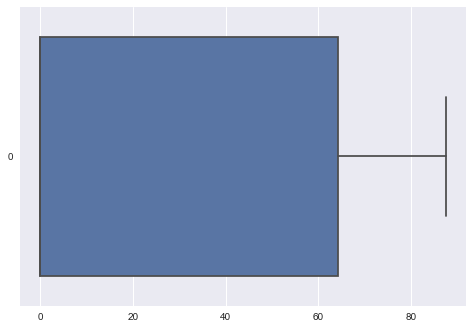

In [217]:
# distribution of stringency of Covid-19 measures
# other_cities = pd.read_csv('C:/Users/User/Downloads/other_cities_df.csv')

plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.boxplot(data=other_cities['stringency'], orient="h")
plt.show()

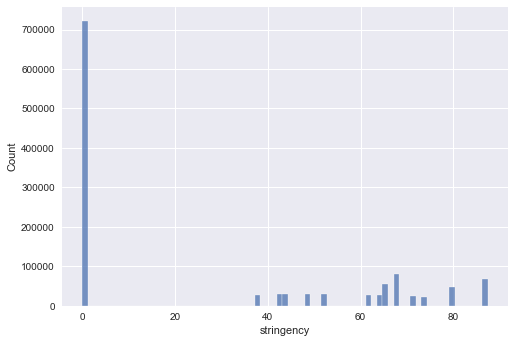

In [218]:
#histogram of stringency of Covid-19 measures 

plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.histplot(data=other_cities['stringency'])
plt.show()

# Plotting Pre-Pandemic Data 

In [28]:
# read dataset with no stringency

other_no_s = other_cities[other_cities['stringency'] == 0.0]
other_no_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,covid,date,stringency,month,year
0,2018-01-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified,0,2018-01,0.0,1,2018
1,2018-01-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified,0,2018-01,0.0,1,2018
2,2018-01-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified,0,2018-01,0.0,1,2018
3,2018-01-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,0,2018-01,0.0,1,2018
4,2018-01-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Offender given community sentence,0,2018-01,0.0,1,2018


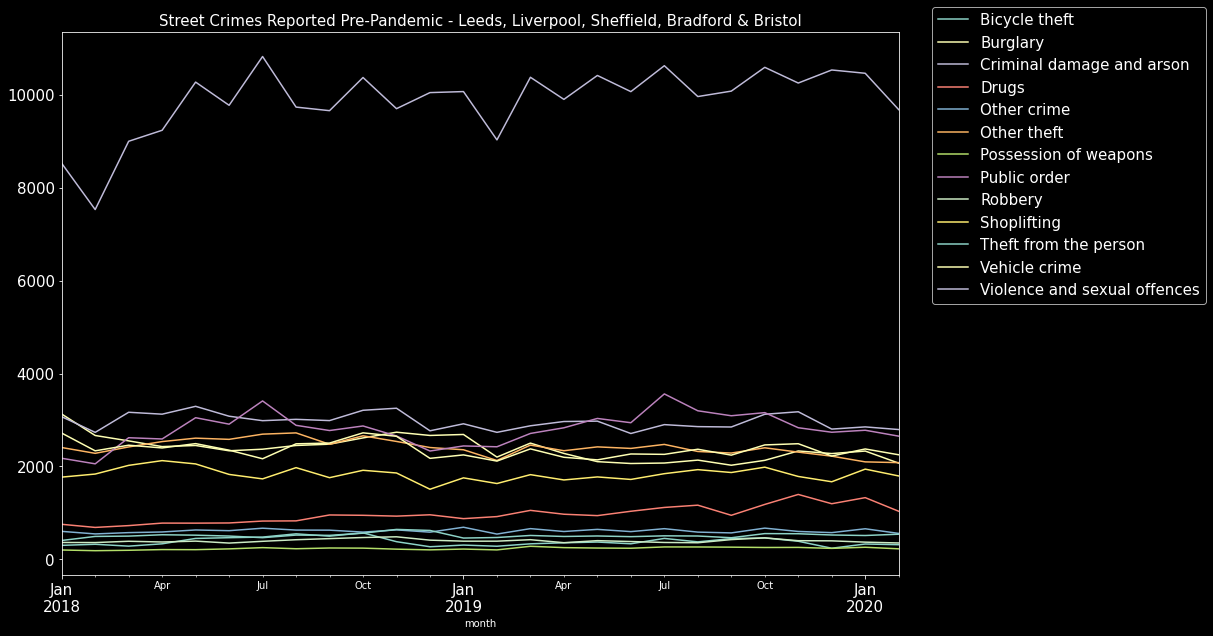

In [29]:
# display graph of crimes against time

plt.style.use('dark_background')
m = other_no_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(False)
plt.title('Street Crimes Reported Pre-Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol',fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
m.legend(loc=(1.04,0.5), fontsize=15)

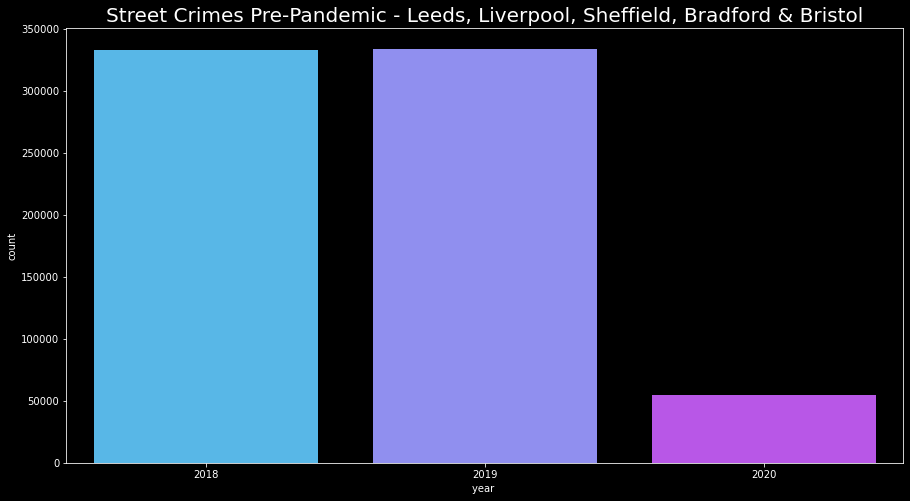

In [30]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_no_s['year '], palette = 'cool',)
plt.title('Street Crimes Pre-Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol', fontsize = 20)

plt.show();

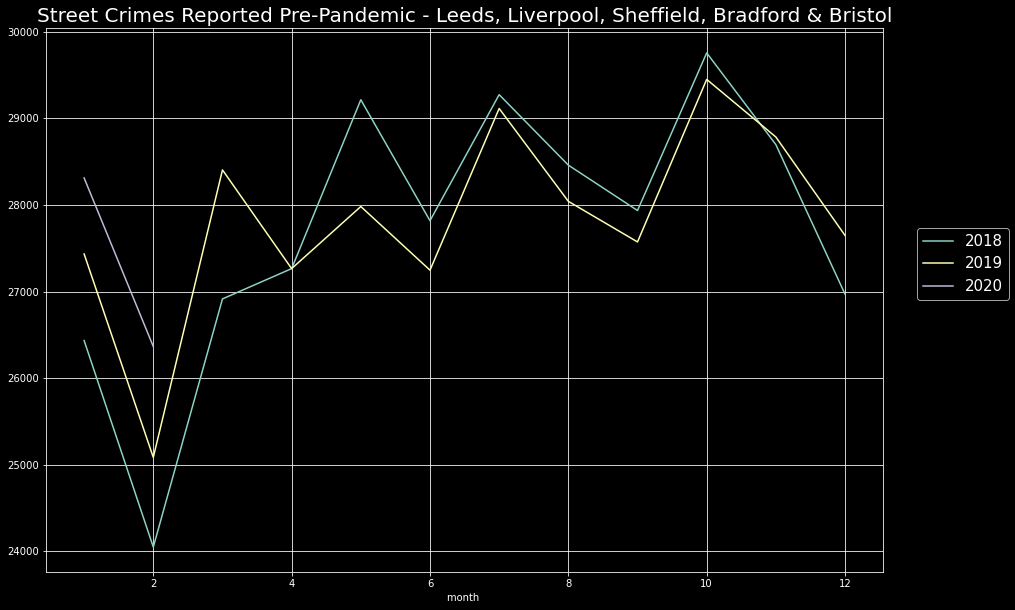

In [34]:
# display crimes reported before the Covid-19 Pandemic

m = other_no_s.groupby(['month ', 'year ']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)
plt.style.use('dark_background')
plt.title('Street Crimes Reported Pre-Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol',fontsize = 20)

m.legend(loc=(1.04,0.5), fontsize = 15)

# Plotting Pandemic Period Data

In [224]:
# data with stringency(pandemic period)

other_s = other_cities[other_cities['stringency'] > 0.0]
other_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,covid,date,stringency,month,year
721522,2020-03-01,West Yorkshire Police,-1.387612,53.936897,On or near North Grove Drive,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,1,2020-03,37.484,3,2020
721523,2020-03-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,1,2020-03,37.484,3,2020
721524,2020-03-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,1,2020-03,37.484,3,2020
721525,2020-03-01,West Yorkshire Police,-1.390705,53.936850,On or near Maple Drive,1011698,Leeds,Other crime,Investigation complete; no suspect identified,1,2020-03,37.484,3,2020
721526,2020-03-01,West Yorkshire Police,-1.396755,53.939828,On or near Aire Mount,1011699,Leeds,Vehicle crime,Investigation complete; no suspect identified,1,2020-03,37.484,3,2020


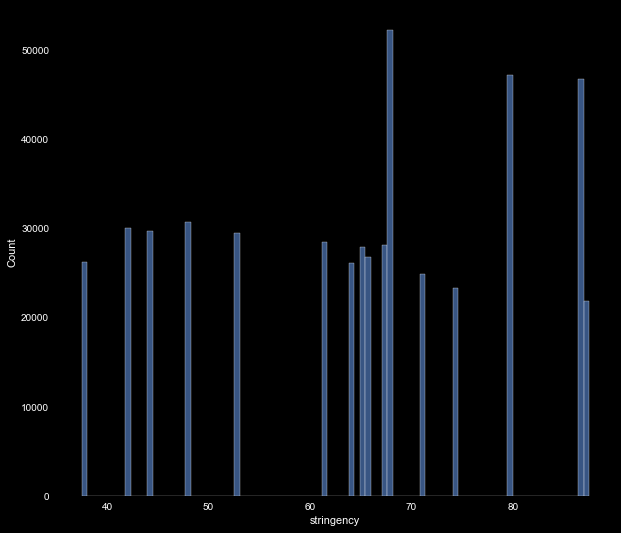

In [225]:
# histogram of stringency of Covid-19 measures 

plt.rcParams['figure.figsize'] = (10, 9)
plt.grid(b=None)
sns.histplot(data=other_s['stringency'])
plt.show()

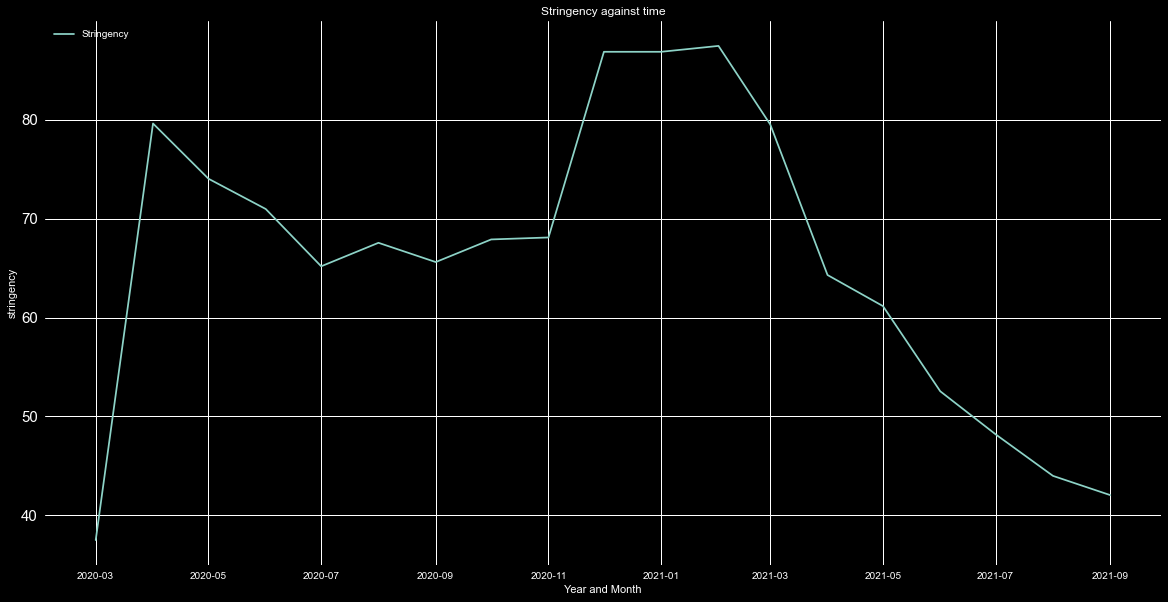

In [226]:
# display stringency against time for five cities

plt.figure(figsize=(20,10))

plt.plot(other_s['month'], other_s['stringency'], label = 'Stringency')

plt.xlabel('Year and Month')
plt.ylabel('stringency')

plt.legend(loc='upper left')
plt.xticks(fontsize =10)
plt.yticks(fontsize =15)
plt.title('Stringency against time')

plt.show()

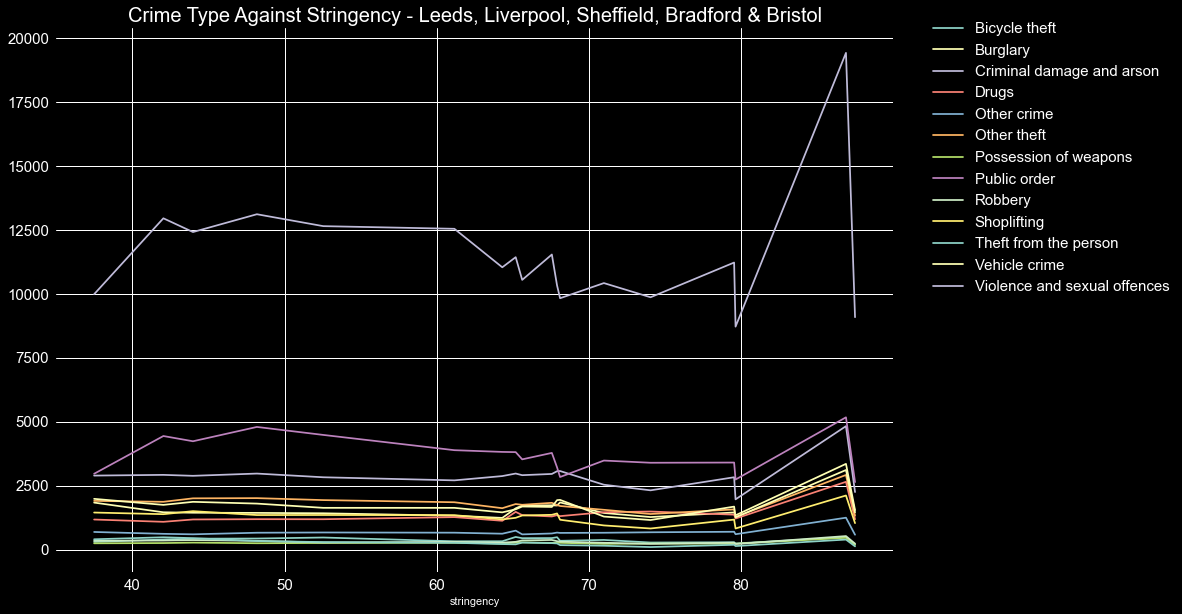

In [227]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

m = other_s.groupby(['stringency', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=True)
plt.title('Crime Type Against Stringency - Leeds, Liverpool, Sheffield, Bradford & Bristol',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
m.legend(loc=(1.04,0.5), fontsize=15)

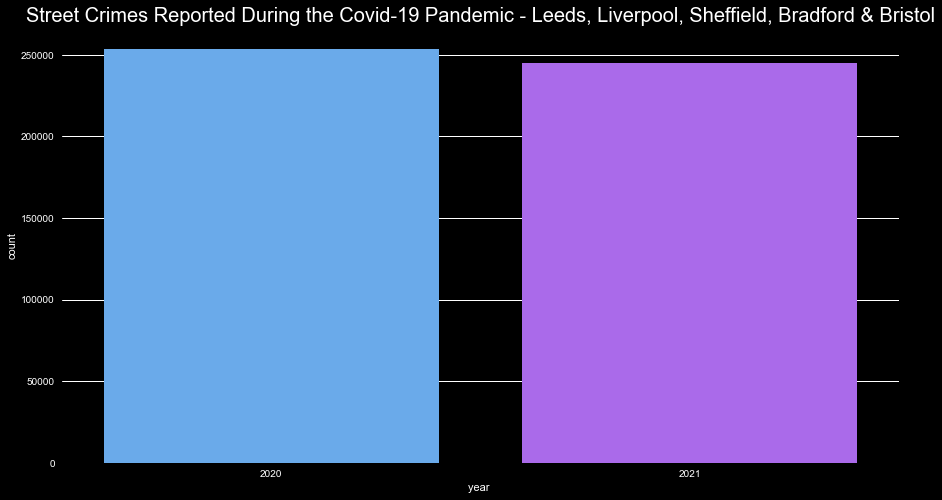

In [229]:
# street crimes reported during the Pandemic

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(other_s['year '], palette = 'cool',)
plt.title('Street Crimes Reported During the Covid-19 Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol', fontsize = 20)

plt.show()

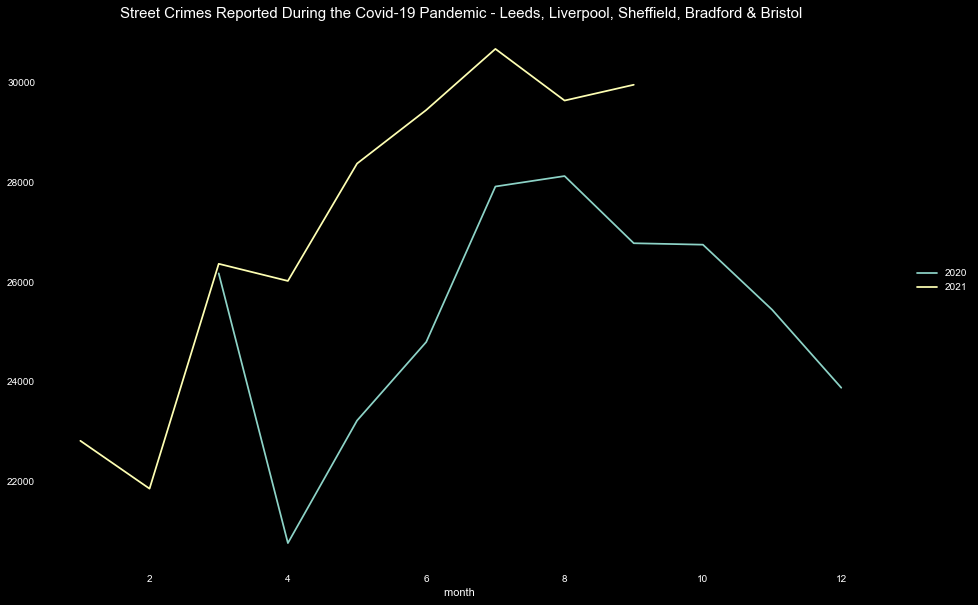

In [232]:
# display street crimes reported each month during the Covid-19 Pandemic

plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

m = other_s.groupby(['month ', 'year ']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)
plt.title('Street Crimes Reported During the Covid-19 Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol',fontsize = 15)
m.legend(loc=(1.04,0.5))

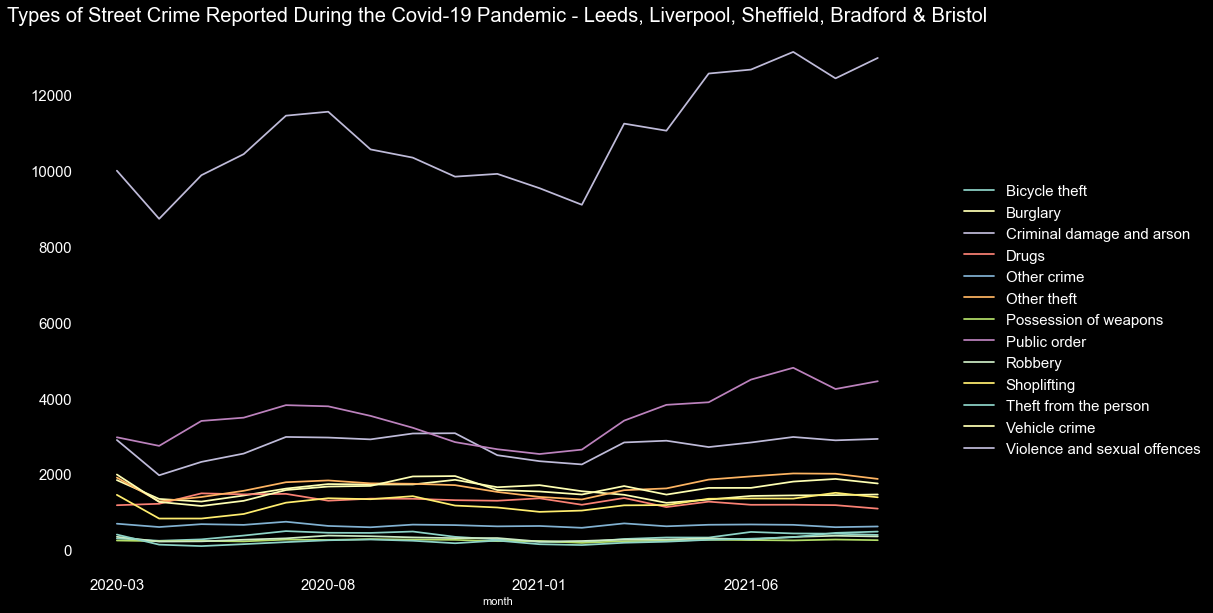

In [96]:
# display types of crime reported each month during the Covid-19 Pandemic

m = other_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Types of Street Crime Reported During the Covid-19 Pandemic - Leeds, Liverpool, Sheffield, Bradford & Bristol',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
m.legend(loc=(1.05,0.2), fontsize=15)

In [157]:
# split data 

leeds_data = other_cities[other_cities['lsoa name'] == 'Leeds']
bradford_data = other_cities[other_cities['lsoa name'] == 'Bradford']
liverpool_data = other_cities[other_cities['lsoa name'] == 'Liverpool']
sheffield_data = other_cities[other_cities['lsoa name'] == 'Sheffield']
bristol_data = other_cities[other_cities['lsoa name'] == 'Bristol']

In [173]:
def add_year(item):
    return item[:5]

In [177]:
leeds_data['year'] = leeds_data['month'].apply(add_year)
bradford_data['year'] = bradford_data['month'].apply(add_year)
liverpool_data['year'] = liverpool_data['month'].apply(add_year)
sheffield_data['year'] = sheffield_data['month'].apply(add_year)
bristol_data['year'] = bristol_data['month'].apply(add_year)

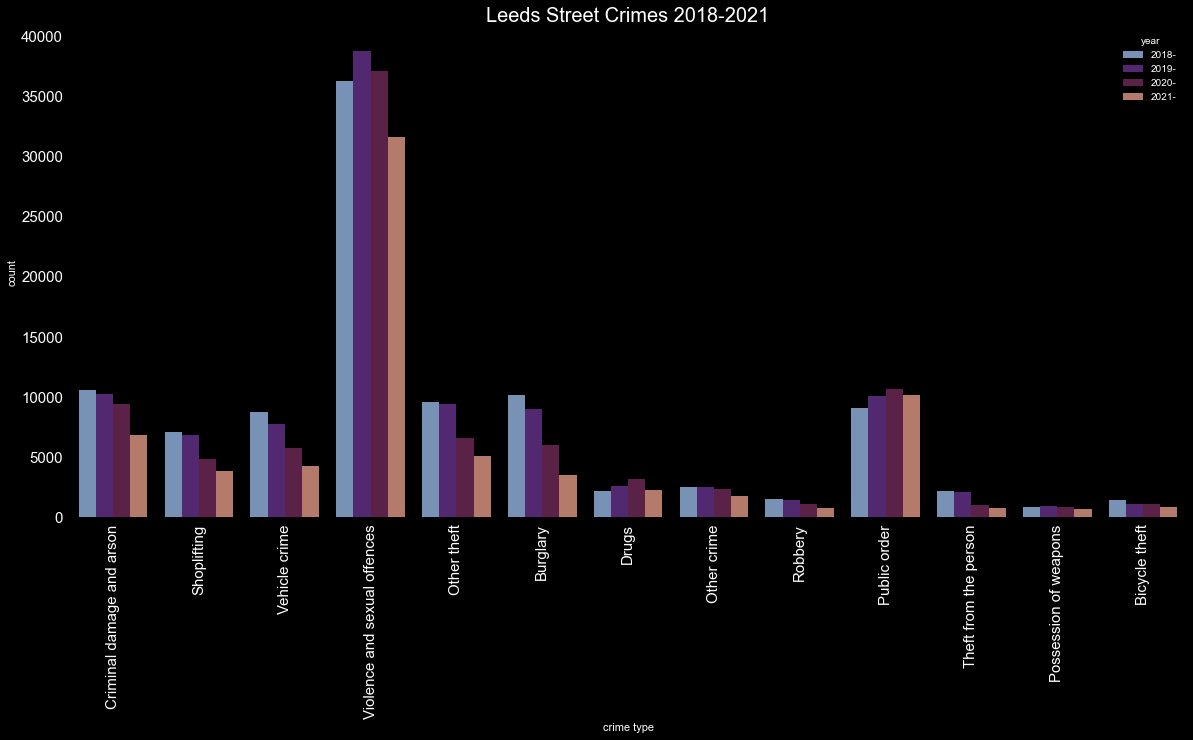

In [178]:
# display Leeds street crime type count 2018-2021

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(leeds_data['crime type'], hue=leeds_data['year'], palette = 'twilight')

plt.title('Leeds Street Crimes 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()

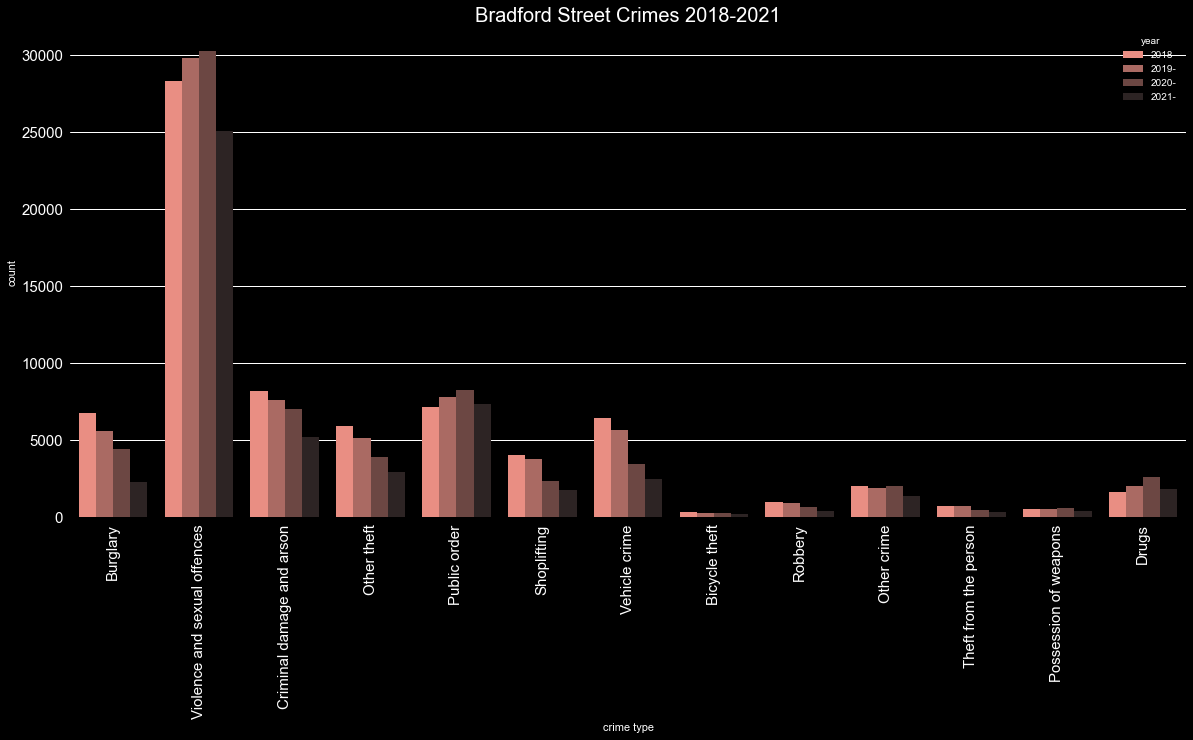

In [180]:
# display Bradford street crime type count 2018-2021

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(bradford_data['crime type'], hue=bradford_data['year'], palette = 'dark:salmon_r')

plt.title('Bradford Street Crimes 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

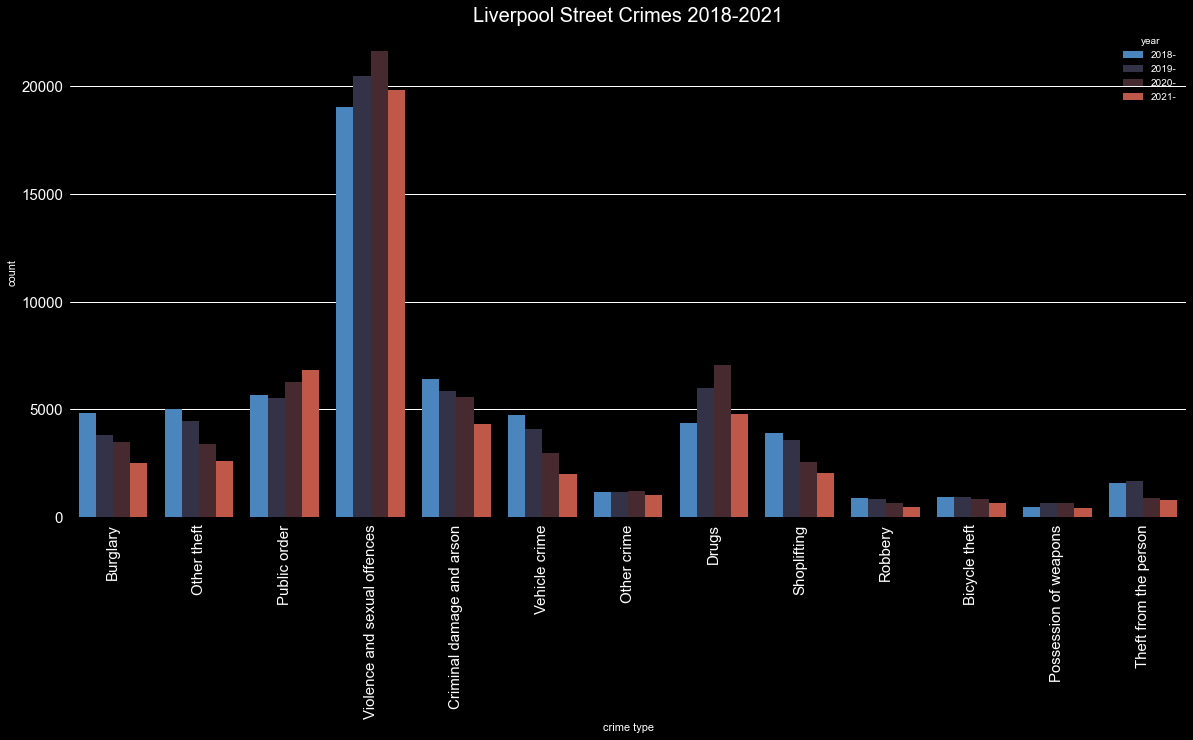

In [181]:
# display Liverpool street crime type count 2018-2021

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(liverpool_data['crime type'], hue=liverpool_data['year'], palette = 'icefire')

plt.title('Liverpool Street Crimes 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

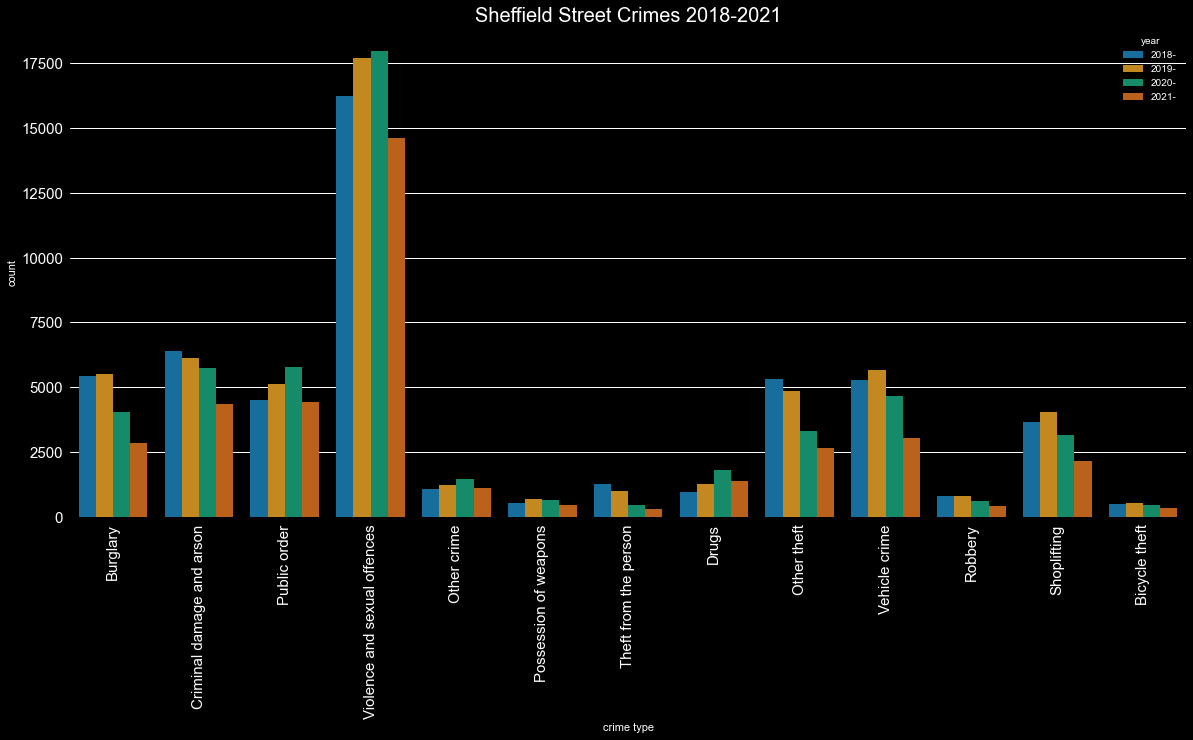

In [182]:
# display Sheffield street crime type count 2018-2021

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(sheffield_data['crime type'], hue=sheffield_data['year'], palette = 'colorblind')

plt.title('Sheffield Street Crimes 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

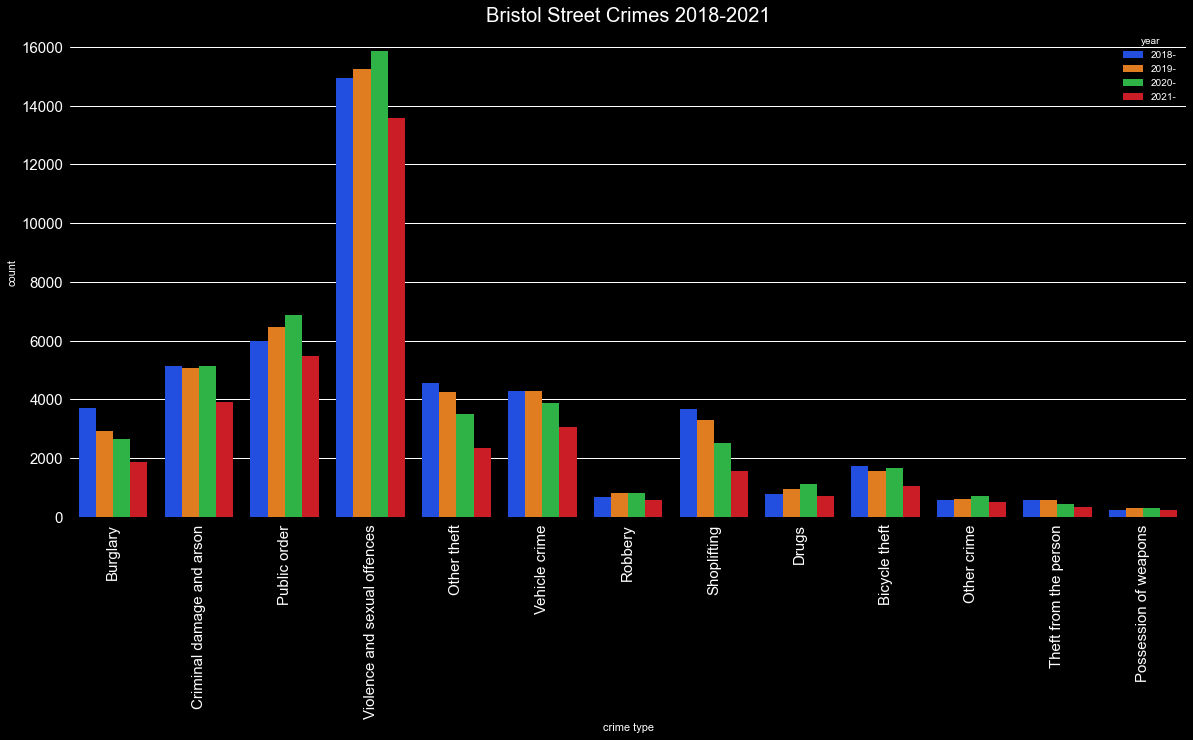

In [183]:
# display Bristol street crime type count 2018-2021

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(bristol_data['crime type'], hue=bristol_data['year'], palette = 'bright')

plt.title('Bristol Street Crimes 2018-2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()